In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10






class BatchAccuracyLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.batch_accuracies = []

    def on_batch_end(self, batch, logs=None):
        self.batch_accuracies.append(logs.get('accuracy'))


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


xavier_initializer = tf.keras.initializers.GlorotNormal()
identity_initializer = tf.keras.initializers.Identity()

class Burgers(Model):
    def __init__(self, num):
        super(Burgers, self).__init__()
        self.flatten = Flatten()
        self.h1 = Dense(16, activation='tanh', kernel_initializer=xavier_initializer)
        
        self.hidden_layers = []
        for _ in range(num):
            self.hidden_layers.append(Dense(16, activation='tanh', kernel_initializer=xavier_initializer))
            self.hidden_layers.append(Dense(4, activation='tanh', kernel_initializer=xavier_initializer))
        self.u = Dense(10, activation='softmax')  
    def call(self, state):
        x = self.h1(state)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.flatten(x)  # Flatten the output before the final layer
        out = self.u(x)
        return out

with tf.device('/GPU:0'):

    numbers = [50]
    for num in numbers:
        exec(f'xavier_acc128_{num} = []')  
        exec(f'xavier_loss128_{num} = []')  
        for _ in range(1): 
            loss_list1 = []
            val_acc_list = []  
            val_loss_list = [] 
            
            model = Burgers(num=num)
            model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
            
            batch_accuracy_logger = BatchAccuracyLogger()
            
            history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))
  
            val_acc_list = history.history['val_accuracy']
            val_loss_list = history.history['val_loss']

            exec(f'xavier_acc128_{num}.append(val_acc_list)')
            exec(f'xavier_loss128_{num}.append(val_loss_list)')

            loss_list1.append(history.history['loss'])

Epoch 1/100
938/938 [==============================] - 65s 65ms/step - loss: 2.3023 - accuracy: 0.1070 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 2/100
938/938 [==============================] - 59s 62ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 3/100
938/938 [==============================] - 60s 64ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/100
938/938 [==============================] - 60s 64ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/100
938/938 [==============================] - 60s 64ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/100
938/938 [==============================] - 60s 64ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_ac

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

class Proposed(tf.keras.initializers.Initializer):
    def __call__(self, shape, dtype=None):
        m, n = shape
        
        if m >= n:
            identity_matrix = np.eye(m, n, dtype=np.float32)
        else:
            identity_matrix = np.zeros((n, m), dtype=np.float32)
            for i in range(n):
                identity_matrix[i, i % m] = 1
            identity_matrix = identity_matrix.transpose()
        
        std = 0.085 * (1 / np.sqrt(n))
        noise = np.random.normal(0, std, size=(shape[0], shape[1]))
        identity_matrix += noise
        return identity_matrix


class BatchAccuracyLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.batch_accuracies = []

    def on_batch_end(self, batch, logs=None):
        self.batch_accuracies.append(logs.get('accuracy'))


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


xavier_initializer = tf.keras.initializers.GlorotNormal()
identity_initializer = tf.keras.initializers.Identity()

class Burgers(Model):
    def __init__(self, num):
        super(Burgers, self).__init__()
        self.flatten = Flatten()
        self.h1 = Dense(16, activation='tanh', kernel_initializer=Proposed())
        self.hidden_layers = []
        for _ in range(num):
            self.hidden_layers.append(Dense(16, activation='tanh', kernel_initializer=Proposed()))
            self.hidden_layers.append(Dense(4, activation='tanh', kernel_initializer=Proposed()))
        self.u = Dense(10, activation='softmax')  
    def call(self, state):
        x = self.h1(state)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.flatten(x)  
        out = self.u(x)
        return out

with tf.device('/GPU:0'):

    numbers = [50]
    for num in numbers:
        exec(f'proposed_acc128_{num} = []')  
        exec(f'proposed_loss128_{num} = []')  
        for _ in range(1):  
            loss_list1 = []
            val_acc_list = [] 
            val_loss_list = [] 
            
            model = Burgers(num=num)
            model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
            batch_accuracy_logger = BatchAccuracyLogger()  
            history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))
            val_acc_list = history.history['val_accuracy']
            val_loss_list = history.history['val_loss']

            exec(f'proposed_acc128_{num}.append(val_acc_list)')
            exec(f'proposed_loss128_{num}.append(val_loss_list)')
            
            # Plot loss history
            loss_list1.append(history.history['loss'])

Epoch 1/100
938/938 [==============================] - 64s 65ms/step - loss: 2.1934 - accuracy: 0.2459 - val_loss: 2.0845 - val_accuracy: 0.2918
Epoch 2/100
938/938 [==============================] - 60s 64ms/step - loss: 1.9908 - accuracy: 0.3374 - val_loss: 1.8963 - val_accuracy: 0.3925
Epoch 3/100
938/938 [==============================] - 60s 64ms/step - loss: 1.8115 - accuracy: 0.4278 - val_loss: 1.7234 - val_accuracy: 0.4560
Epoch 4/100
938/938 [==============================] - 60s 64ms/step - loss: 1.6492 - accuracy: 0.4886 - val_loss: 1.5693 - val_accuracy: 0.5123
Epoch 5/100
938/938 [==============================] - 60s 64ms/step - loss: 1.5069 - accuracy: 0.5311 - val_loss: 1.4362 - val_accuracy: 0.5495
Epoch 6/100
938/938 [==============================] - 61s 65ms/step - loss: 1.3831 - accuracy: 0.5661 - val_loss: 1.3250 - val_accuracy: 0.5773
Epoch 7/100
938/938 [==============================] - 61s 65ms/step - loss: 1.2715 - accuracy: 0.5981 - val_loss: 1.2174 - val_ac

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

class Proposed(tf.keras.initializers.Initializer):
    def __call__(self, shape, dtype=None):
        m, n = shape
        
        if m >= n:
            identity_matrix = np.eye(m, n, dtype=np.float32)
        else:
            identity_matrix = np.zeros((n, m), dtype=np.float32)
            for i in range(n):
                identity_matrix[i, i % m] = 1
            identity_matrix = identity_matrix.transpose()
        
        std = 0.085 * (1 / np.sqrt(n))
        noise = np.random.normal(0, std, size=(shape[0], shape[1]))
        identity_matrix += noise
        return identity_matrix


class BatchAccuracyLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.batch_accuracies = []

    def on_batch_end(self, batch, logs=None):
        self.batch_accuracies.append(logs.get('accuracy'))


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


xavier_initializer = tf.keras.initializers.GlorotNormal()
He_initializer = tf.keras.initializers.GlorotNormal()

class Burgers(Model):
    def __init__(self, num):
        super(Burgers, self).__init__()
        self.flatten = Flatten()
        self.h1 = Dense(16, use_bias=False, kernel_initializer=He_initializer)
        self.h1_bn = BatchNormalization()
        self.hidden_layers = []
        for _ in range(num):
            self.hidden_layers.append((Dense(16, kernel_initializer=He_initializer), BatchNormalization()))
            self.hidden_layers.append((Dense(4, kernel_initializer=He_initializer), BatchNormalization()))
        self.u = Dense(10, activation='softmax')  
        
    def call(self, state, training=False):
        x = self.h1(state)
        x = self.h1_bn(x, training=training)
        x = tf.nn.relu(x) 
        
        for dense_layer, batch_norm in self.hidden_layers:
            x = dense_layer(x)
            x = batch_norm(x, training=training)
            x = tf.nn.relu(x)  
            
        x = self.flatten(x)  
        out = self.u(x)
        return out


with tf.device('/GPU:0'):

    numbers = [50]
    for num in numbers:
        exec(f'hebatch_acc128_{num} = []')  
        exec(f'hebatch_loss128_{num} = []')  
        for _ in range(1): 
            loss_list1 = []
            val_acc_list = []  
            val_loss_list = []  
            
            model = Burgers(num=num)
            model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
            
            batch_accuracy_logger = BatchAccuracyLogger()
            
            history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

            val_acc_list = history.history['val_accuracy']
            val_loss_list = history.history['val_loss']

            exec(f'hebatch_acc128_{num}.append(val_acc_list)')
            exec(f'hebatch_loss128_{num}.append(val_loss_list)')
            
            loss_list1.append(history.history['loss'])

Epoch 1/100
938/938 [==============================] - 211s 215ms/step - loss: 2.7406 - accuracy: 0.1019 - val_loss: 2.3727 - val_accuracy: 0.0936
Epoch 2/100
938/938 [==============================] - 200s 213ms/step - loss: 2.6656 - accuracy: 0.1034 - val_loss: 2.3259 - val_accuracy: 0.1139
Epoch 3/100
938/938 [==============================] - 199s 213ms/step - loss: 2.6109 - accuracy: 0.1038 - val_loss: 2.4020 - val_accuracy: 0.1099
Epoch 4/100
938/938 [==============================] - 200s 213ms/step - loss: 2.5733 - accuracy: 0.1054 - val_loss: 2.3126 - val_accuracy: 0.1135
Epoch 5/100
938/938 [==============================] - 199s 212ms/step - loss: 2.5463 - accuracy: 0.1073 - val_loss: 2.3470 - val_accuracy: 0.1187
Epoch 6/100
938/938 [==============================] - 199s 212ms/step - loss: 2.5201 - accuracy: 0.1086 - val_loss: 2.3317 - val_accuracy: 0.1283
Epoch 7/100
938/938 [==============================] - 199s 212ms/step - loss: 2.4867 - accuracy: 0.1123 - val_loss: 2

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10




class BatchAccuracyLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.batch_accuracies = []

    def on_batch_end(self, batch, logs=None):
        self.batch_accuracies.append(logs.get('accuracy'))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


xavier_initializer = tf.keras.initializers.GlorotNormal()
orthogonal_initializer = tf.keras.initializers.Orthogonal()

class Burgers(Model):
    def __init__(self, num):
        super(Burgers, self).__init__()
        self.flatten = Flatten()

        self.h1 = Dense(16, activation='relu', kernel_initializer=orthogonal_initializer)
        
        self.hidden_layers = []
        for _ in range(num):
            self.hidden_layers.append(Dense(16, activation='relu', kernel_initializer=orthogonal_initializer))
            self.hidden_layers.append(Dense(4, activation='relu', kernel_initializer=orthogonal_initializer))
        self.u = Dense(10, activation='softmax')  
    def call(self, state):
        x = self.h1(state)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.flatten(x)  
        out = self.u(x)
        return out


with tf.device('/GPU:0'):

    numbers = [50]
    for num in numbers:
        exec(f'orthogonal_acc128_{num} = []')  
        exec(f'orthogonal_loss128_{num} = []')  
        for _ in range(1):  
            loss_list1 = []
            val_acc_list = [] 
            val_loss_list = []  
            
            model = Burgers(num=num)
            model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
            
            batch_accuracy_logger = BatchAccuracyLogger()
            
            history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

            val_acc_list = history.history['val_accuracy']
            val_loss_list = history.history['val_loss']

            exec(f'orthogonal_acc128_{num}.append(val_acc_list)')
            exec(f'orthogonal_loss128_{num}.append(val_loss_list)')
            
            loss_list1.append(history.history['loss'])

Epoch 1/100
938/938 [==============================] - 65s 66ms/step - loss: 2.3026 - accuracy: 0.1111 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 2/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3025 - accuracy: 0.1124 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 3/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3024 - accuracy: 0.1124 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 4/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3024 - accuracy: 0.1124 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 5/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 6/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 7/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3022 - val_ac

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10





class BatchAccuracyLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.batch_accuracies = []

    def on_batch_end(self, batch, logs=None):
        self.batch_accuracies.append(logs.get('accuracy'))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


xavier_initializer = tf.keras.initializers.GlorotNormal()
orthogonal_initializer = tf.keras.initializers.Orthogonal()

class Burgers(Model):
    def __init__(self, num):
        super(Burgers, self).__init__()
        self.flatten = Flatten()
        self.h1 = Dense(16, activation='relu', kernel_initializer=He_initializer)
        
        self.hidden_layers = []
        for _ in range(num):
            self.hidden_layers.append(Dense(16, activation='relu', kernel_initializer=He_initializer))
            self.hidden_layers.append(Dense(4, activation='relu', kernel_initializer=He_initializer))
        self.u = Dense(10, activation='softmax')  
    def call(self, state):
        x = self.h1(state)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.flatten(x)  
        out = self.u(x)
        return out


with tf.device('/GPU:0'):

    numbers = [50]
    for num in numbers:
        exec(f'he_acc128_{num} = []')  
        exec(f'he_loss128_{num} = []')  
        for _ in range(1):  
            loss_list1 = []
            val_acc_list = [] 
            val_loss_list = [] 
            
            model = Burgers(num=num)
            model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
            

            batch_accuracy_logger = BatchAccuracyLogger()
            
            history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))
 

            val_acc_list = history.history['val_accuracy']
            val_loss_list = history.history['val_loss']

            exec(f'he_acc128_{num}.append(val_acc_list)')
            exec(f'he_loss128_{num}.append(val_loss_list)')
            
            loss_list1.append(history.history['loss'])

Epoch 1/100
938/938 [==============================] - 65s 66ms/step - loss: 2.3026 - accuracy: 0.1123 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 2/100
938/938 [==============================] - 61s 66ms/step - loss: 2.3025 - accuracy: 0.1124 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 3/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3024 - accuracy: 0.1124 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 4/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3024 - accuracy: 0.1124 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 5/100
938/938 [==============================] - 61s 66ms/step - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 6/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 7/100
938/938 [==============================] - 61s 65ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3022 - val_ac

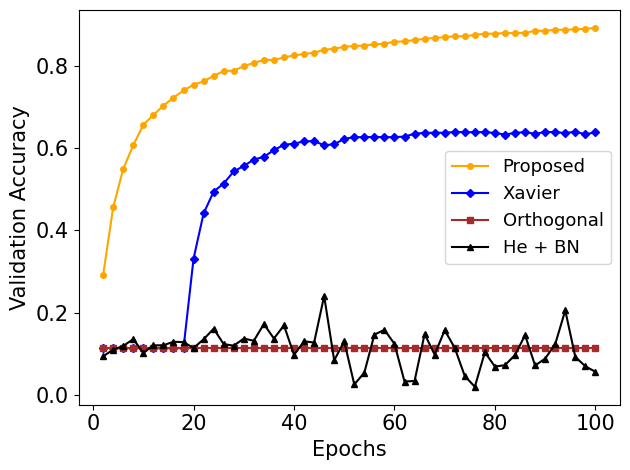

In [59]:
x_ticks3 = [i * 2 for i in range(1, len(proposed_acc128_50[0][::2]) + 1)]

plt.plot(x_ticks3, proposed_acc128_50[0][::2], label='Proposed', color='orange', linestyle='-', marker='o', markersize=4)
plt.plot(x_ticks3, xavier_acc128_50[0][::2], label='Xavier', color='blue', linestyle='-', marker='D', markersize=4)  
plt.plot(x_ticks3, orthogonal_acc128_50[0][::2], label='Orthogonal', color='brown', linestyle='-', marker='s', markersize=4)  
plt.plot(x_ticks3, hebatch_acc128_50[0][::2], label='He + BN', color='black', linestyle='-', marker='^', markersize=4)  
plt.legend(fontsize= 13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Validation Accuracy", fontsize=15)
plt.tight_layout()
plt.savefig('C_initialization.png', dpi = 300)